In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
data = pd.read_csv('../data/catanstats.csv')
data

,gameNum,player,points,me,2,3,4,5,6,7,...,settlement2_resource3,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,NaN,0,5,3,6,13,13,...,S,41,8,11,60,22,4,0,26,34
196,50,1,5,NaN,1,7,4,5,7,17,...,C,41,6,7,54,14,6,4,24,30
197,50,2,10,1.0,1,7,4,5,7,17,...,C,64,5,9,78,15,6,10,31,47
198,50,3,4,NaN,1,7,4,5,7,17,...,S,44,7,4,55,22,1,8,31,24


## EDA

Text(0, 0.5, 'points')

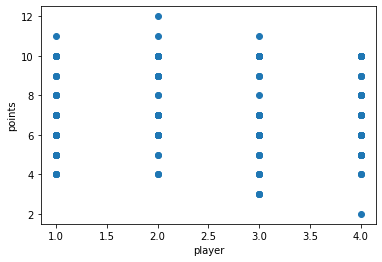

In [18]:
fig, ax = plt.subplots()

ax.scatter(data['player'], data['points'])
ax.set_xlabel('player')
ax.set_ylabel('points')

How did our players fare? 

In [28]:
winnings = data[['gameNum','player','points']]
winnings = winnings[winnings['points'] >= 10]
winnings.head()

,gameNum,player,points
2,1,3,10
4,2,1,10
9,3,2,10
13,4,2,10
17,5,2,10


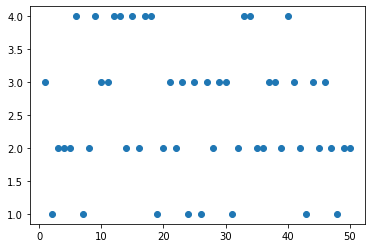

In [29]:
plt.scatter(winnings['gameNum'], winnings['player'])

In [45]:
win_counts = winnings.groupby('player').count().rename(columns = {'points':'Count of Wins'})
win_counts.drop('gameNum', axis = 1 , inplace = True)
win_counts


,Count of Wins
player,
1,8
2,18
3,14
4,10


In [57]:
percent_win = []
total = win_counts['Count of Wins'].sum()
for idx, row in win_counts.iterrows():
        a = row/total
        percent_win.append(a[0])

win_counts['% wins'] = percent_win
win_counts

,Count of Wins,% wins
player,,
1,8,0.16
2,18,0.36
3,14,0.28
4,10,0.20


### Initial settlements placement testing

In [151]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score

In [110]:
settlements = data.iloc[:,0:27].drop(['me','2','3','4','5','6','7','8','9','10','11','12'], axis = 1)
settlements = pd.get_dummies(settlements, columns = ['settlement1_resource1','settlement1_resource2','settlement1_resource3','settlement2_resource1','settlement2_resource2','settlement2_resource3'])
settlements

,gameNum,player,points,settlement1,settlement1_num2,settlement1_num3,settlement2,settlement2_num2,settlement2_num3,settlement1_resource1_C,...,settlement2_resource3_2S,settlement2_resource3_2W,settlement2_resource3_3G,settlement2_resource3_B,settlement2_resource3_C,settlement2_resource3_D,settlement2_resource3_L,settlement2_resource3_O,settlement2_resource3_S,settlement2_resource3_W
0,1,1,5,6,3,11,9,10,11,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2,9,5,8,10,4,5,11,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,10,5,6,12,8,4,3,0,...,0,0,0,0,1,0,0,0,0,0
3,1,4,5,6,9,3,4,8,10,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1,10,6,9,10,8,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,4,3,4,5,11,0,...,0,0,0,0,0,0,0,0,1,0
196,50,1,5,6,9,10,5,6,11,0,...,0,0,0,0,1,0,0,0,0,0
197,50,2,10,8,4,3,4,9,11,0,...,0,0,0,0,1,0,0,0,0,0
198,50,3,4,5,8,10,5,9,2,1,...,0,0,0,0,0,0,0,0,1,0


In [184]:
y_s = settlements['points']
X_s = settlements.drop('points', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = .25)

In [185]:
model = RandomForestRegressor()
fitted = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residual = y_test - y_pred
# mean_squared_error(y_test, y_pred)
print(model.score(X_test,y_test))


0.02709158000670897


In [178]:
r2_score(y_test, y_pred)

0.0742039900249376

In [187]:
features = model.feature_importances_
name = X_s.columns
feat_name = pd.DataFrame(features, index = name).sort_values(by = 0, ascending = False)
feat_name

,0
gameNum,0.133128
settlement2_num2,0.126914
settlement1_num2,0.054478
settlement2_num3,0.053447
settlement1_num3,0.046547
player,0.042154
settlement2,0.041766
settlement1_resource2_C,0.040194
settlement1_resource2_O,0.028422
settlement1,0.025620


Text(0, 0.5, 'Actuals')

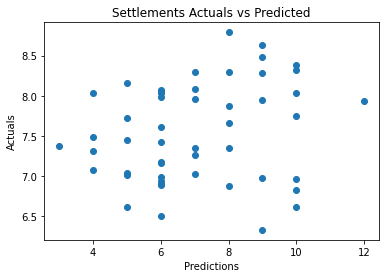

In [115]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
plt.title("Settlements Actuals vs Predicted")
plt.xlabel('Predictions')
plt.ylabel('Actuals')


### Exploring the gains and losses columns

In [135]:

# gain_loss = data.drop(columns = ['settlement1_resource1','settlement1_resource2','settlement1_resource3','settlement2_resource1','settlement2_resource2','settlement2_resource3','me','2','3','4','5','6','7','8','9','10','11','12'], inplace = True)

gain_loss = data.drop(columns = ['settlement1','settlement1_num2','settlement1_num3','settlement2','settlement2_num2','settlement2_num3','production','totalGain','totalLoss', 'totalAvailable','tribute'])
gain_loss

,gameNum,player,points,tradeGain,robberCardsGain,tradeLoss,robberCardsLoss
0,1,1,5,5,2,10,2
1,1,2,9,8,6,11,1
2,1,3,10,14,9,24,4
3,1,4,5,12,0,24,6
4,2,1,10,15,16,28,10
...,...,...,...,...,...,...,...
195,49,4,5,8,11,22,4
196,50,1,5,6,7,14,6
197,50,2,10,5,9,15,6
198,50,3,4,7,4,22,1


In [136]:
X_gain = gain_loss.drop('points', axis = 1)
y_gain = gain_loss['points']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_gain, y_gain)

gain_model = RandomForestRegressor()
gain_fit = gain_model.fit(X_train, y_train)
y_pred = gain_model.predict(X_test)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')


Mean squared error: 3.7124420000000002
R2: 0.0742039900249376


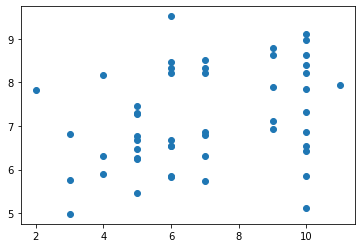

In [148]:
plt.scatter(y_test, y_pred)

In [177]:
feature_importance = gain_model.feature_importances_
feature_names = X_gain.columns

important_features = pd.DataFrame(feature_importance, index = feature_names).sort_values(by = 0, ascending = False)
important_features

,0
tradeLoss,0.249600
robberCardsGain,0.243195
gameNum,0.168049
tradeGain,0.147515
robberCardsLoss,0.135404
player,0.056237
